Client Data Sample:
                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44  

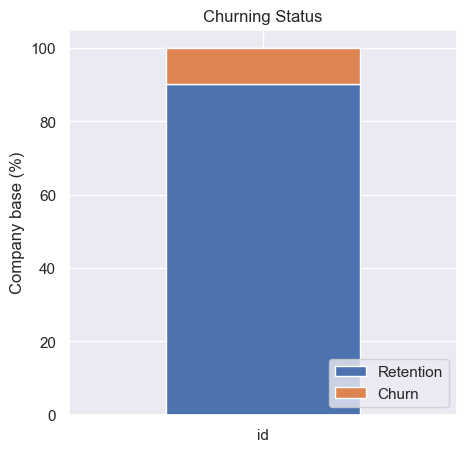

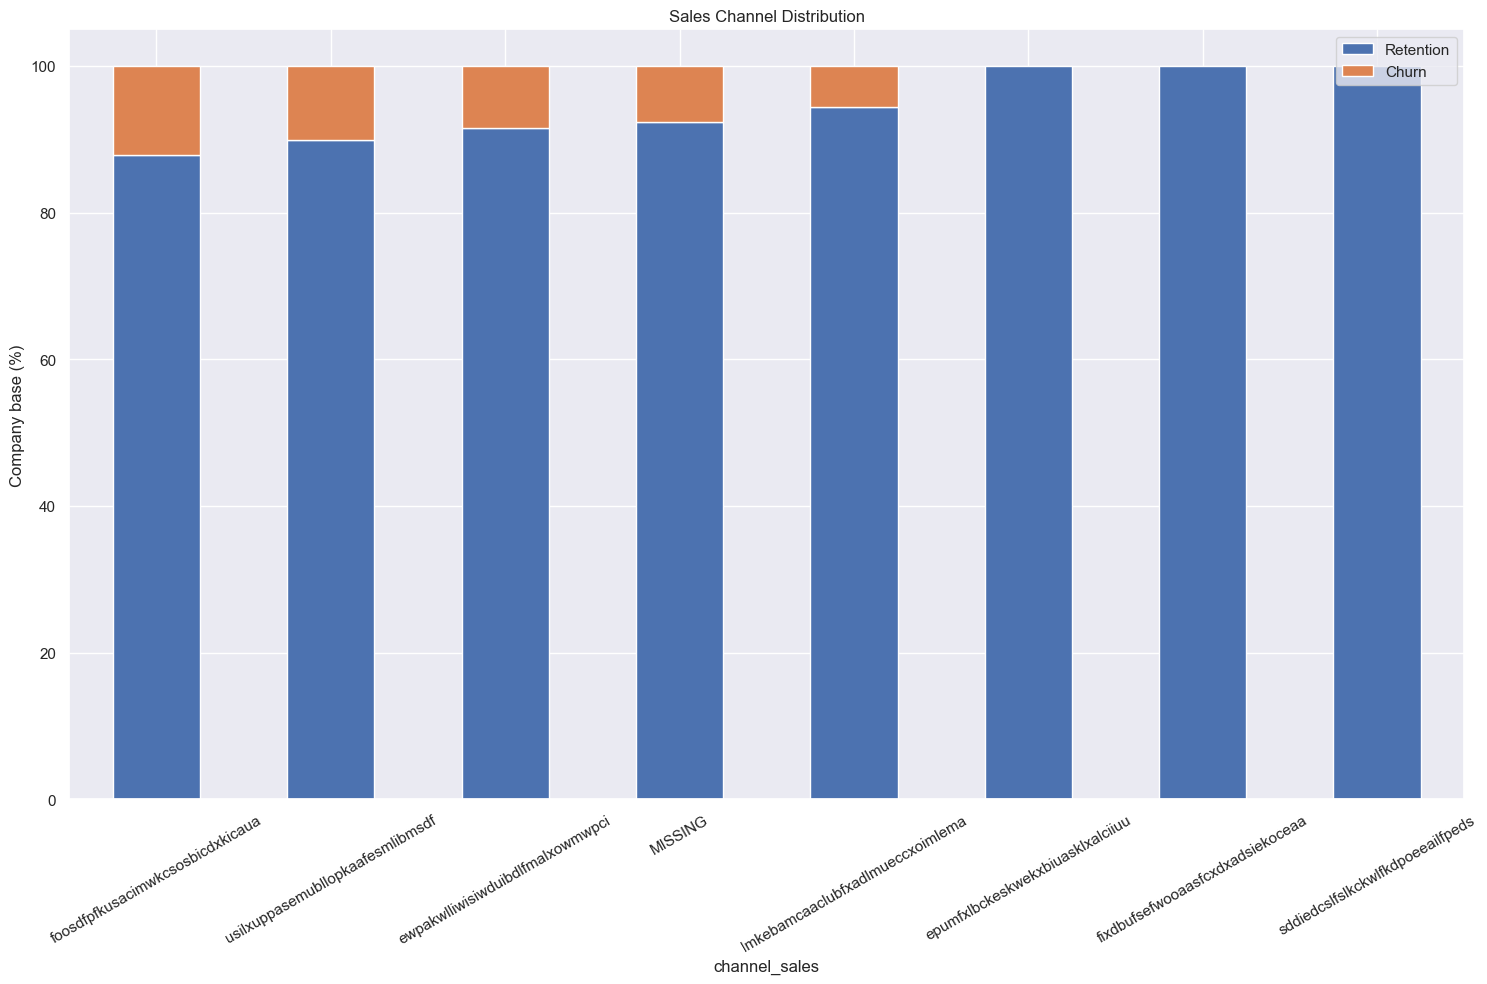

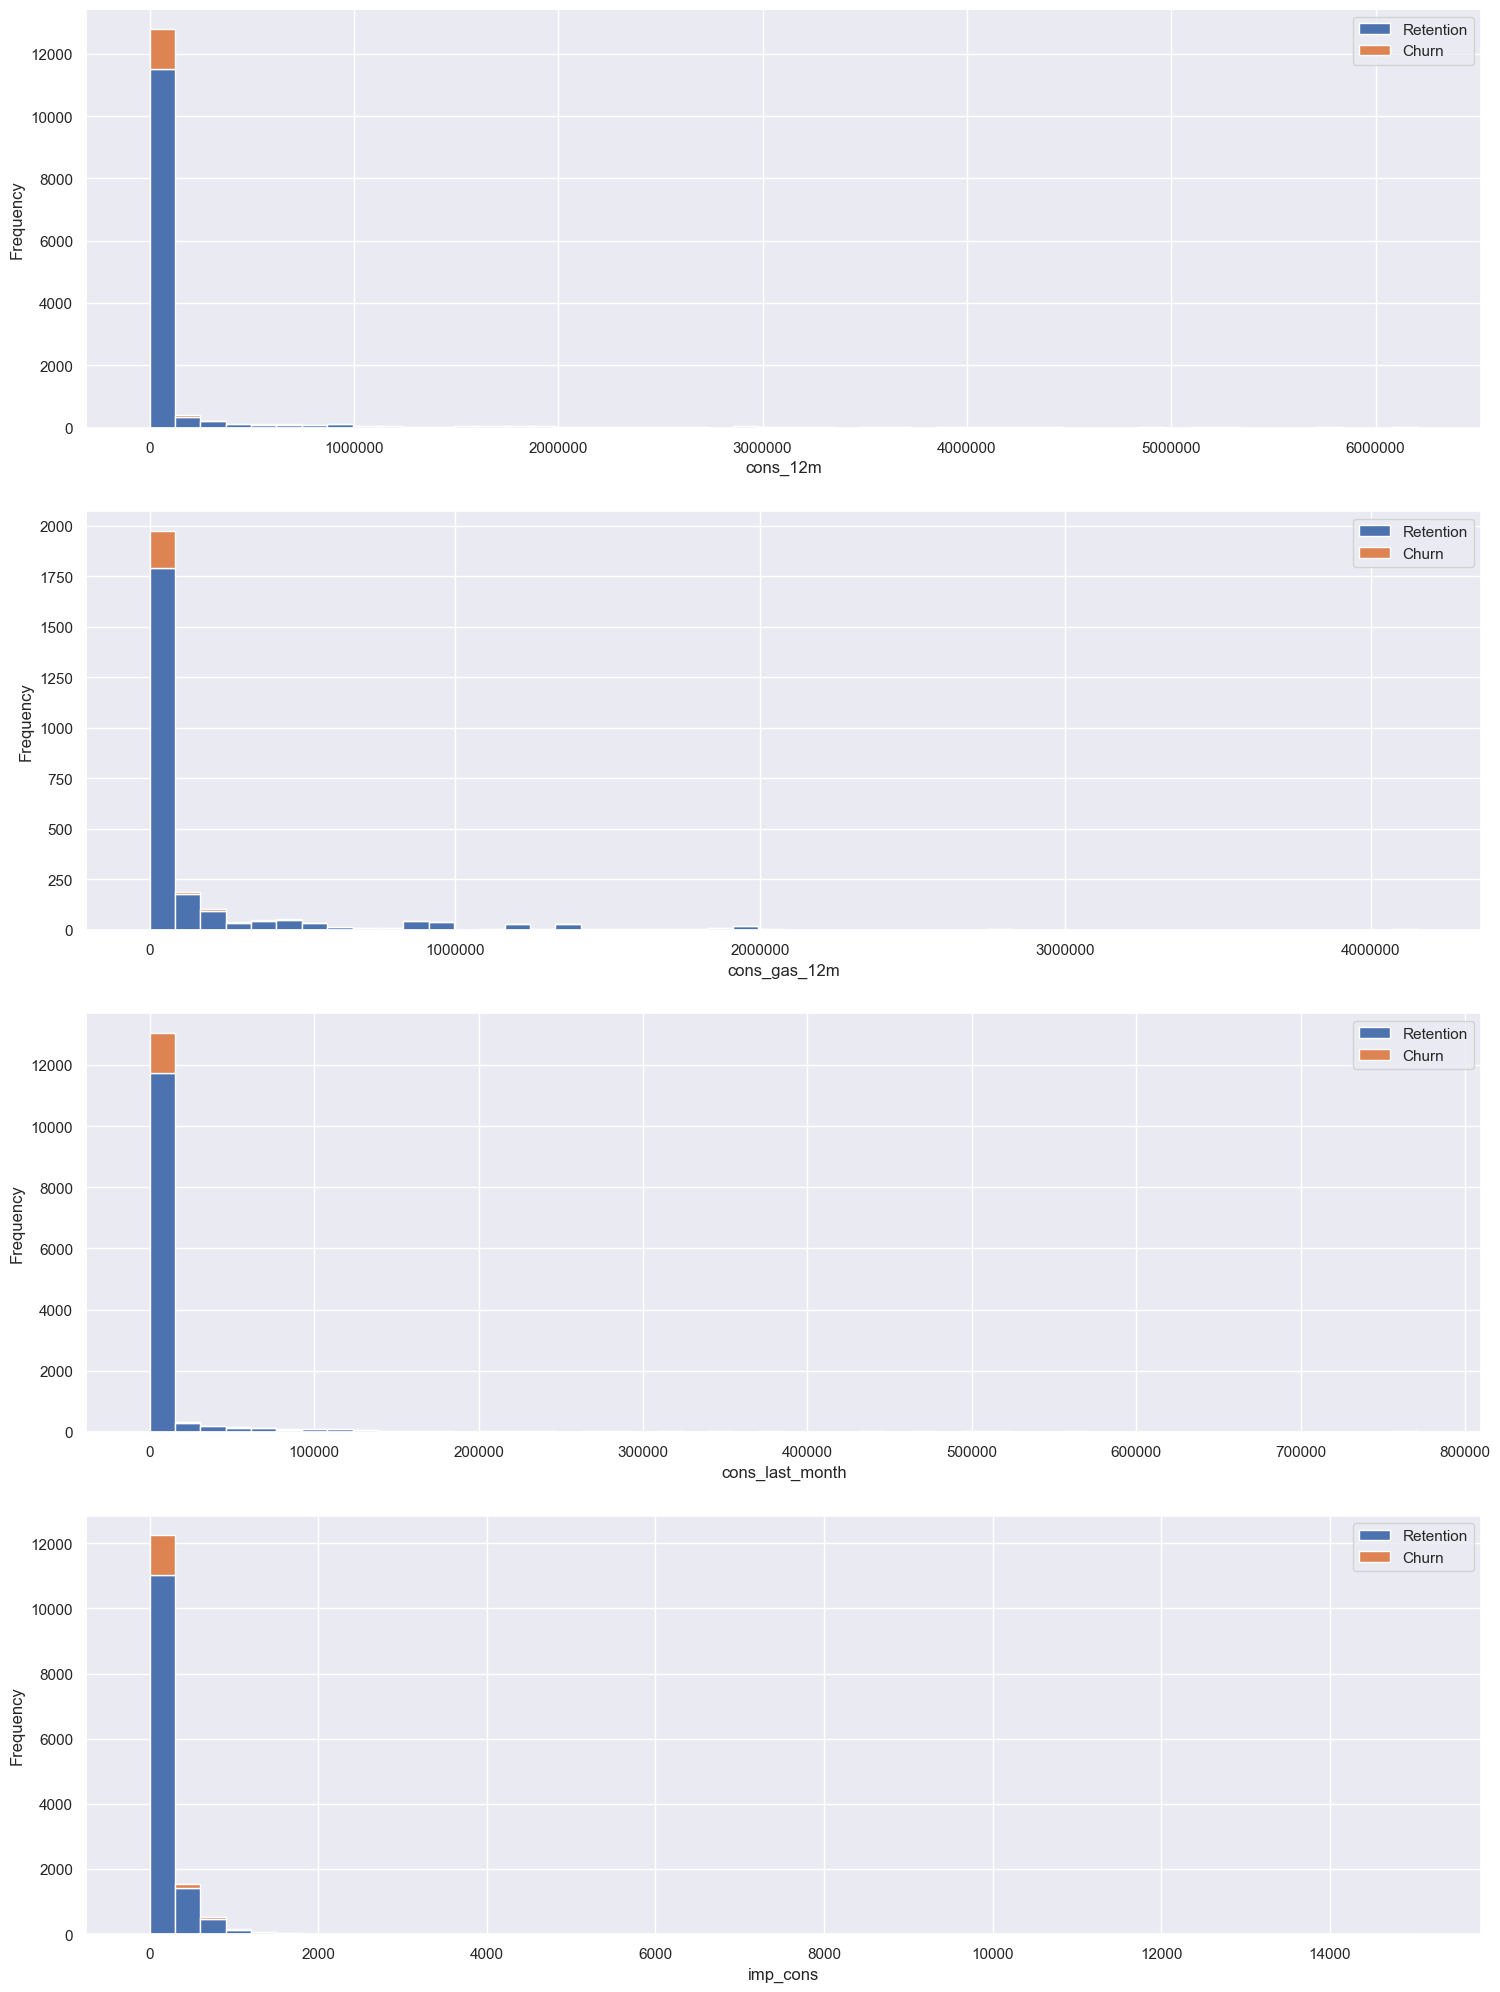

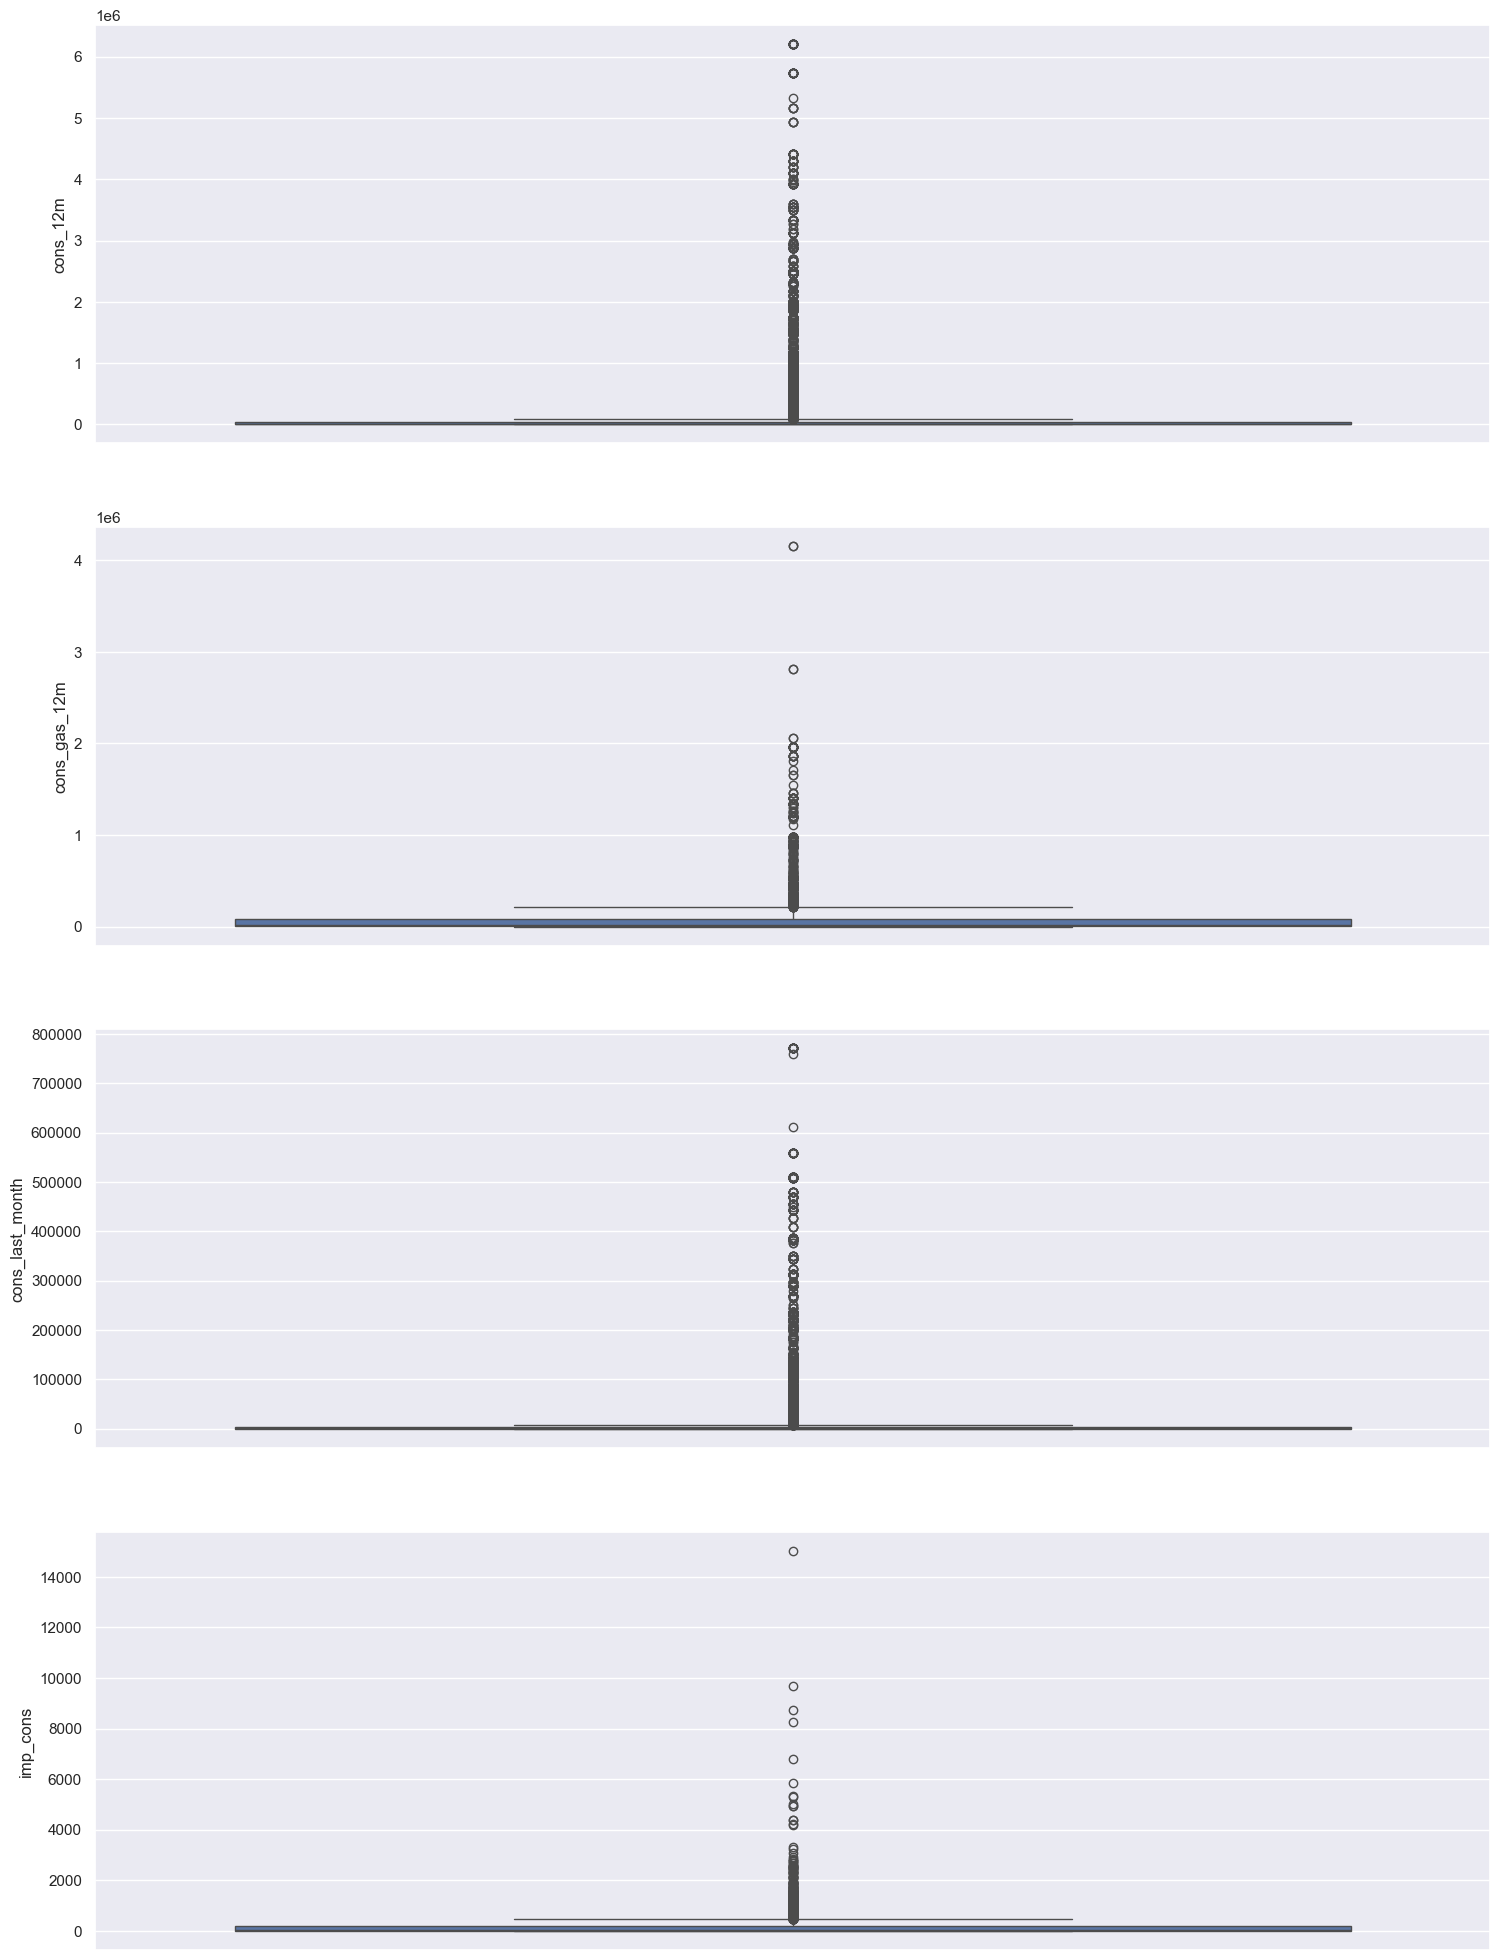

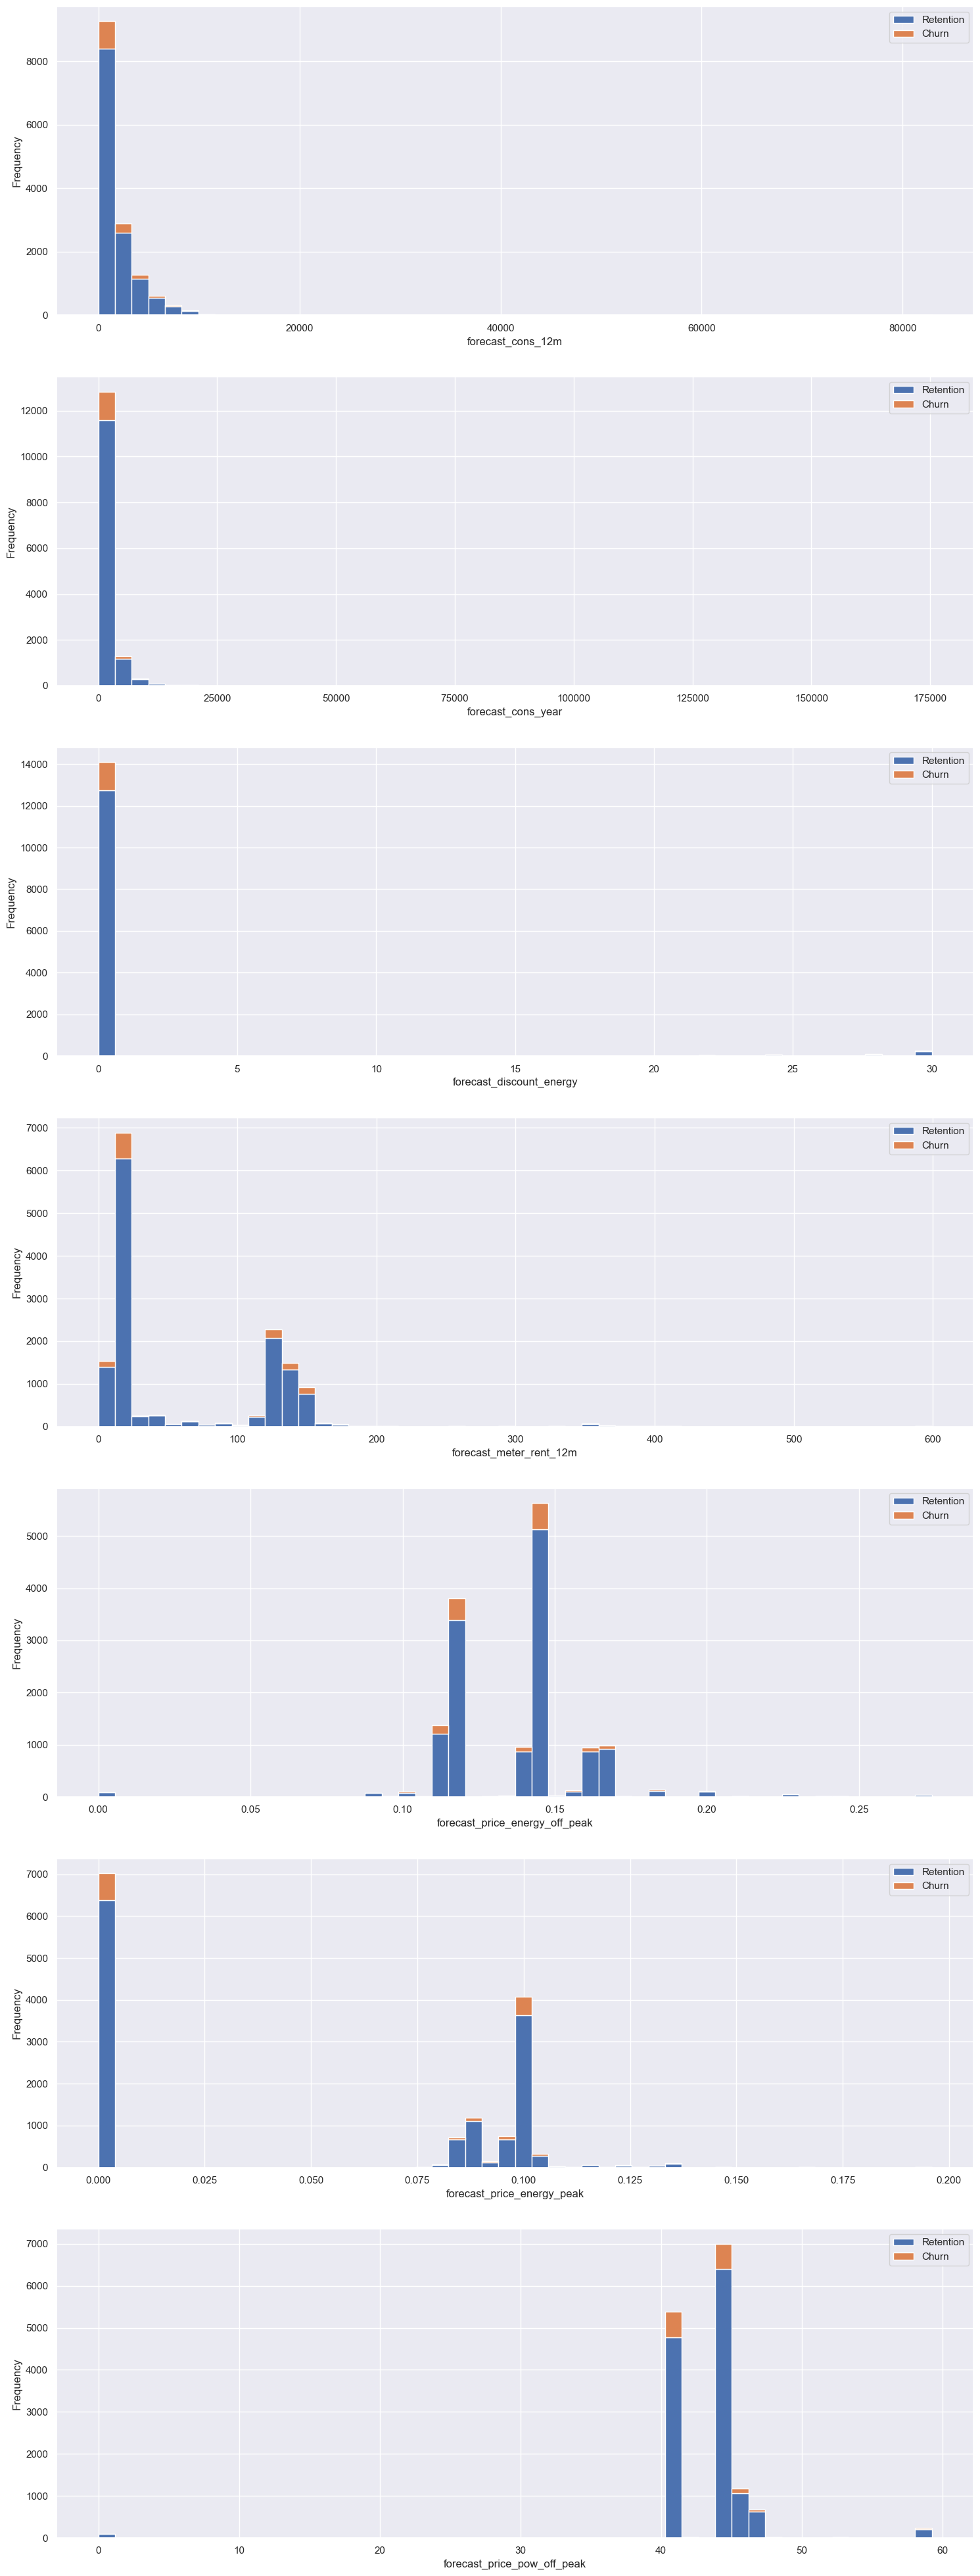

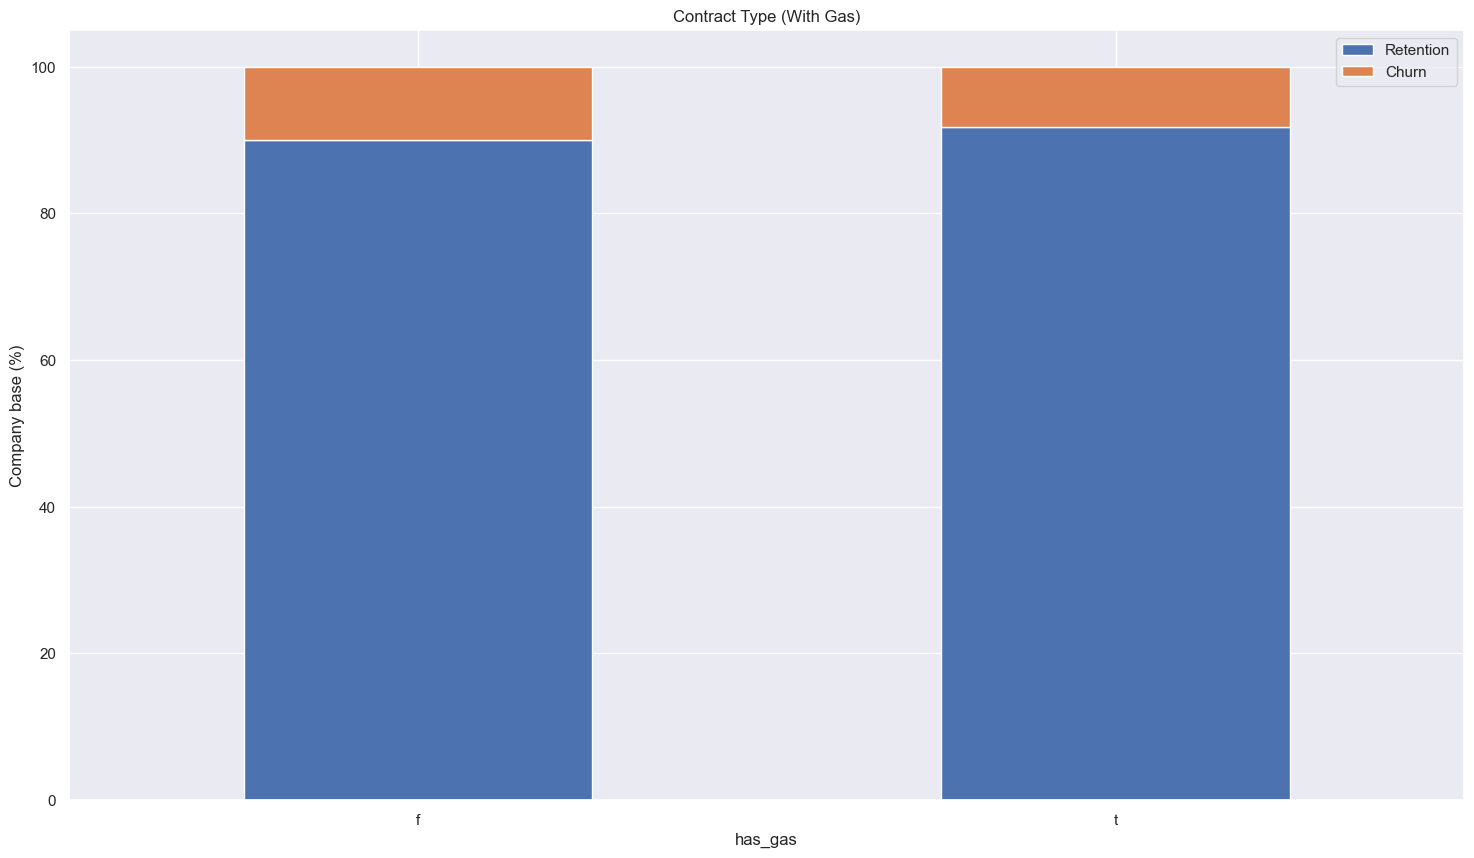

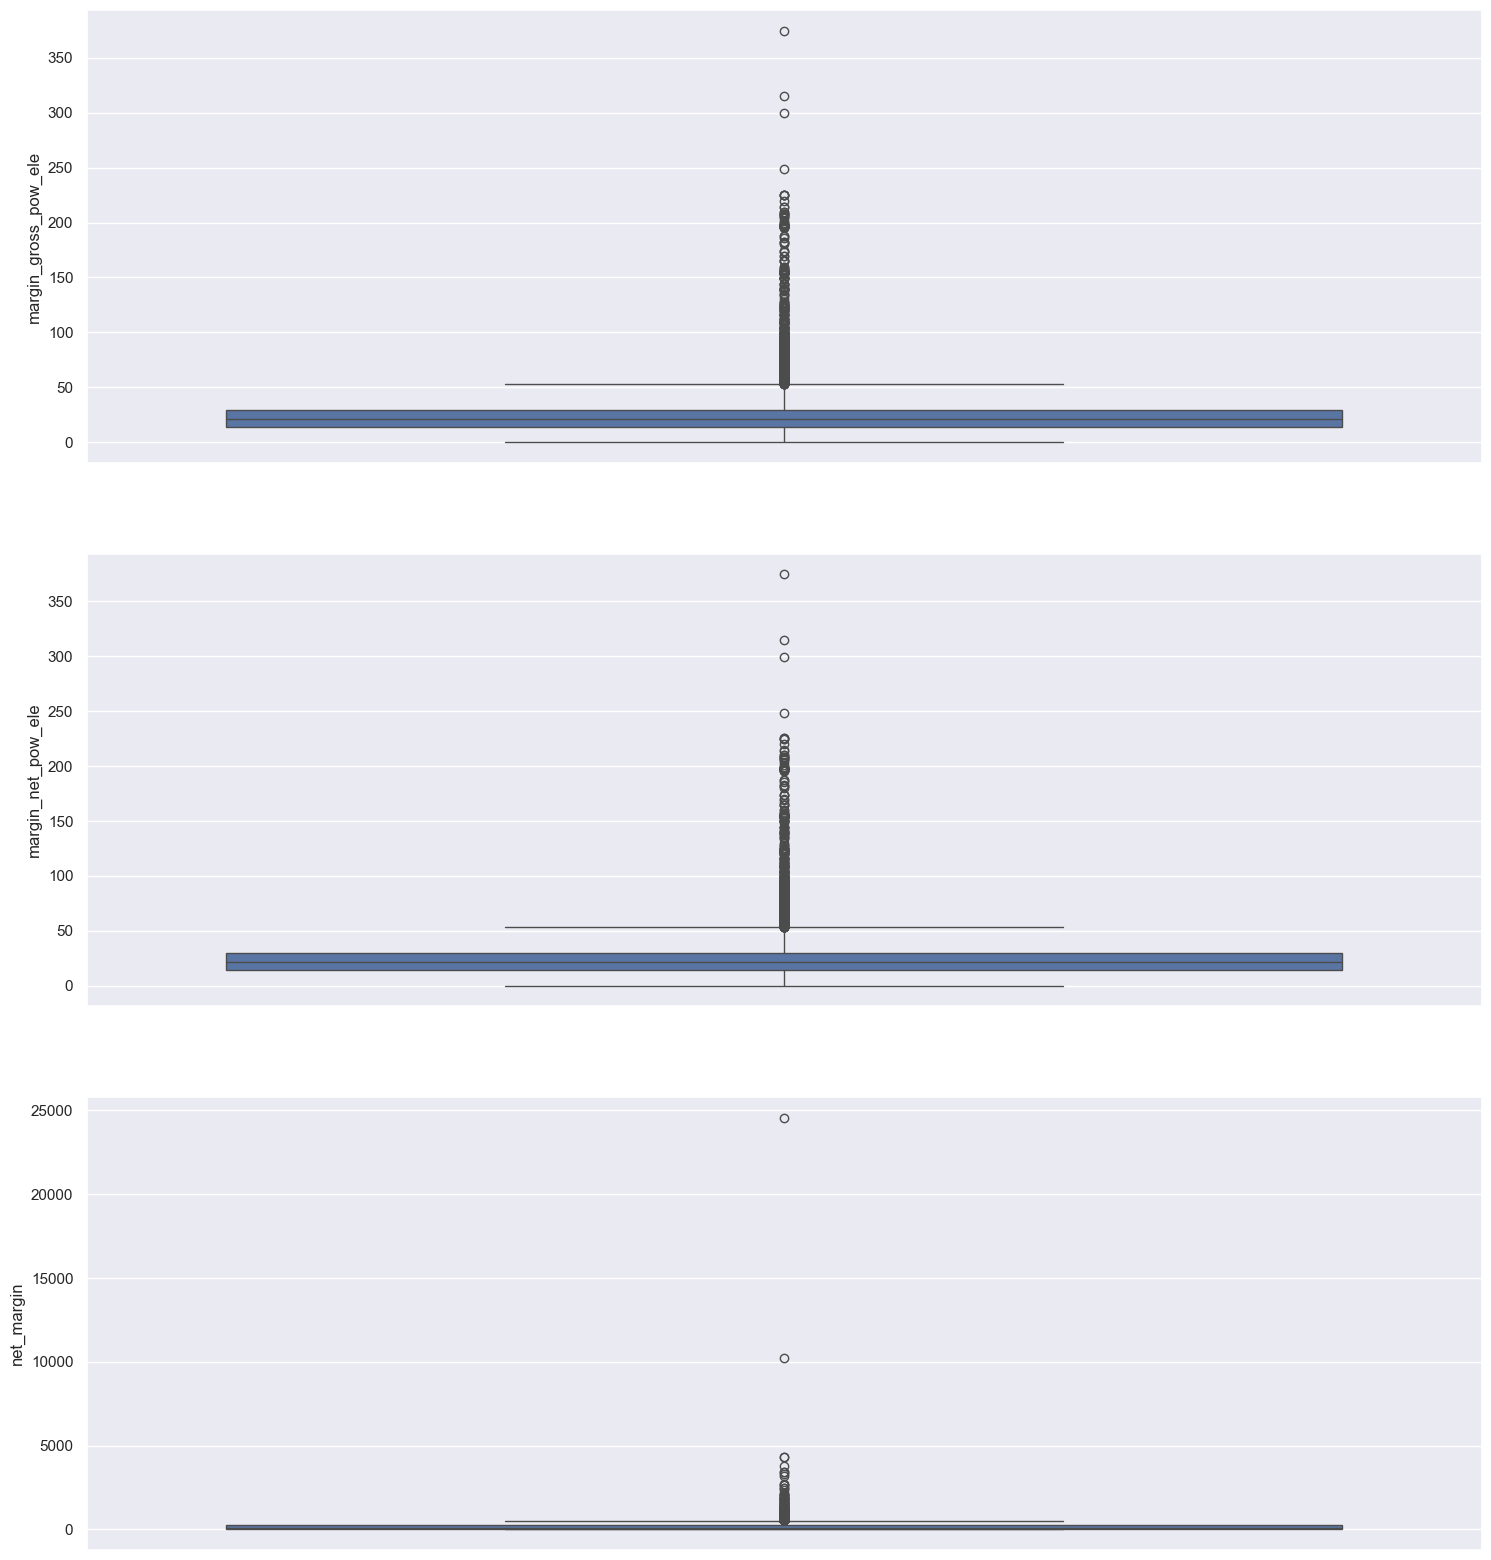

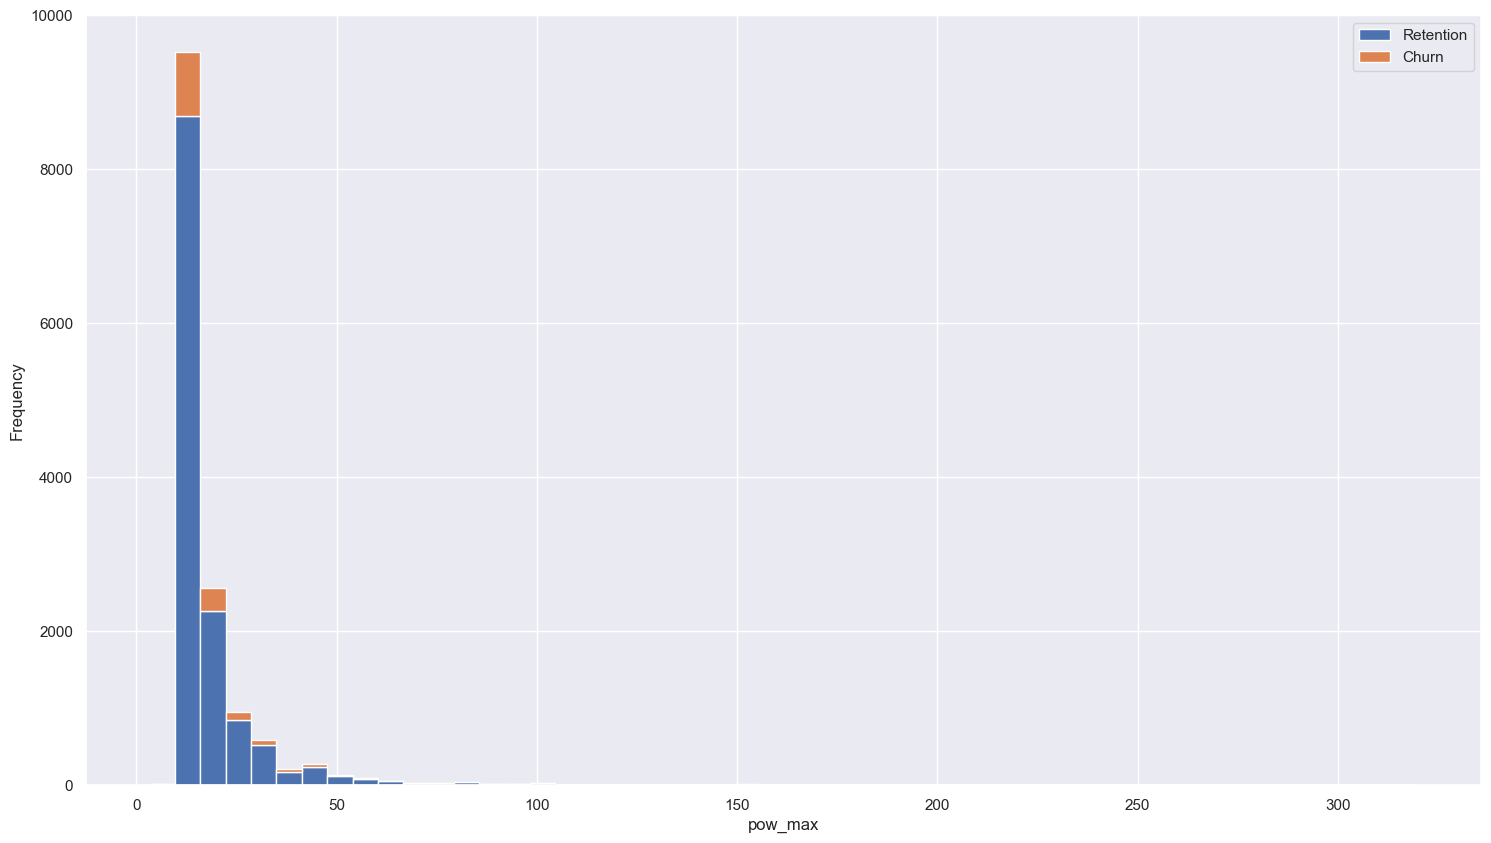

In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set plot style
sns.set(color_codes=True)

# Load datasets
client_df = pd.read_csv('../data/raw/client_data.csv')
price_df = pd.read_csv('../data/raw/price_data.csv')

# Display first few rows of both datasets
print("Client Data Sample:")
print(client_df.head(3))
print("\nPrice Data Sample:")
print(price_df.head(3))

# Data Information
print("\nClient Data Info:")
print(client_df.info())
print("\nPrice Data Info:")
print(price_df.info())

# Summary statistics
print("\nClient Data Statistics:")
print(client_df.describe())
print("\nPrice Data Statistics:")
print(price_df.describe())

# Define stacked bar plot function
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """Plot stacked bars with annotations."""
    ax = dataframe.plot(kind="bar", stacked=True, figsize=size_, rot=rot_, title=title_)
    plt.legend(["Retention", "Churn"], loc=legend_)
    plt.ylabel("Company base (%)")
    plt.show()

# Churn Analysis
churn = client_df[['id', 'churn']].groupby('churn').count()
churn_percentage = churn / churn.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning Status", (5, 5), legend_="lower right")

# Sales Channel Analysis
channel = client_df.groupby(['channel_sales', 'churn'])['id'].count().unstack().fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, 'Sales Channel Distribution', rot_=30)

# Function to plot distributions
def plot_distribution(dataframe, column, ax, bins_=50):
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column], "Churn": dataframe[dataframe["churn"]==1][column]})
    temp.plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

# Consumption Analysis
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
plot_distribution(client_df, 'cons_12m', axs[0])
plot_distribution(client_df[client_df['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(client_df, 'cons_last_month', axs[2])
plot_distribution(client_df, 'imp_cons', axs[3])
plt.show()

# Boxplots for Outlier Detection
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
sns.boxplot(client_df["cons_12m"], ax=axs[0])
sns.boxplot(client_df[client_df["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(client_df["cons_last_month"], ax=axs[2])
sns.boxplot(client_df["imp_cons"], ax=axs[3])
plt.show()

# Forecast Analysis
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
forecast_columns = ["forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy",
                    "forecast_meter_rent_12m", "forecast_price_energy_off_peak",
                    "forecast_price_energy_peak", "forecast_price_pow_off_peak"]
for i, col in enumerate(forecast_columns):
    plot_distribution(client_df, col, axs[i])
plt.show()

# Contract Type Analysis
contract = client_df.groupby(['has_gas', 'churn'])['id'].count().unstack()
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(contract_percentage, 'Contract Type (With Gas)')

# Margin Analysis
margin_cols = ["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
for i, col in enumerate(margin_cols):
    sns.boxplot(client_df[col], ax=axs[i])
plt.show()

# Subscribed Power Analysis
fig, ax = plt.subplots(figsize=(18, 10))
plot_distribution(client_df, 'pow_max', ax)
plt.show()
